*(which of the align styles available in the `AlignImages` class does the best job of preparing data cube images for subtraction?)*

In [ ]:
# if you haven't pulled the "subtract_psf" directory from GitHub, skip this cell
from klip_retrieve import KlipRetrieve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Motivation

I've written three image alignment strategies for `KlipRetrieve` that aim to line up data cubes of reference and target images as closely as possible before moving on to KLIP and stellar PSF subtraction. In this notebook, I will try to figure out which leads to the best subtractions. A review:
- `'theoretical'` takes advantage of the fact that these are canned observations and we know everything that went into them. It removes each image's respective dither shift and pointing error (dither error is ignored since it's so much smaller than NirSpec's pixel size), leaving an array of with the star's exact (arcsecond) position in each image. It calculates and compares the star's mean pixel position in the reference images to its mean pixel position in the target images. If the two means don't fall on the same pixel, the reference images are shifted as a group to make them match.
- `'empirical1'` takes the middle route in terms of foreknowledge. It still removes each image's respective dither shift and pointing error. However, instead of "cheating" by looking at the array of exact star positions, it assumes that the brightest pixel in an image is the star. It calculates and compares the mean bright pixel positions in the reference and target sets. If the two means don't fall on the same pixel, the reference images are shifted as a group to make them match.
- `'empirical2'` tries to be the most "honest" about what we would know in an actual observation. It removes the dither shifts and nothing else. It assumes that the brightest pixel in a given image holds the star. However, instead of taking the mean bright pixel position in the reference and target groups, it shifts each individual image so the bright pixel is in the same location in all of them.

Begin by creating a class instance of each directory of reference and target images that uses each strategy.
**Note that these cells take about five muntes to run and can be skipped if you don't want to wait.)**

In [ ]:
# caution: this cell takes ~5 minutes to run and can be skipped if necessary
theo = [KlipRetrieve('/user/jotor/gen_images/30_slice_4_os' + str(i),
                     align_style='theoretical')
        for i in np.arange(10)]

commence removal of dither shifts
(30, 30, 30) data cube shape at beginning
(30, 34, 34) data cube shape at end

commence removal of pointing error
(30, 34, 34) data cube shape at beginning
(30, 34, 40) data cube shape at end

mean star position by set
---
ref: (0.0085, -0.0072)
sci: (-0.0301, 0.0491)

pythagorean separation between sets is LARGER THAN OPTIMAL at 0.0683 arcseconds
post-alignment separation is  0.0583 arcseconds
(30, 34, 40) data cube shape at beginning
(30, 36, 42) data cube shape at end

(30, 25, 21) data cube shape after removing padding

********
non-padded image shape: (25, 21)
********

********
injecting companion with (location-specific) 5-sigma intensity.
********
max_safes 9 6
[-6 -5 -4 -3 -2  2  3  4  5  6]
[-9 -8 -7 -6 -5 -4 -3 -2  2  3  4  5  6  7  8  9]
11.0 9 -5
commence removal of dither shifts
(30, 30, 30) data cube shape at beginning
(30, 34, 34) data cube shape at end

commence removal of pointing error
(30, 34, 34) data cube shape at beginning
(30, 4

In [ ]:
# caution: this cell takes ~5 minutes to run and can be skipped if necessary
emp_1 = [KlipRetrieve('/user/jotor/gen_images/30_slice_4_os' + str(i),
                      align_style='empirical1')
         for i in np.arange(10)]

commence removal of dither shifts
(30, 30, 30) data cube shape at beginning
(30, 34, 34) data cube shape at end

commence removal of pointing error
(30, 34, 34) data cube shape at beginning
(30, 34, 40) data cube shape at end

[(16, 20), (16, 20), (17, 19), (17, 20), (16, 19), (16, 20), (16, 20), (16, 20), (17, 20), (17, 20)]
[(17, 19), (17, 19), (17, 19), (17, 19), (17, 19), (16, 20), (17, 19), (17, 19), (17, 19), (17, 19)]
r [19.8 16.4] t [19.1 16.9]
r [20. 16.] t [19. 17.]
[-1  0]
Pixel offset of mean brightest pixel in sci & ref sets is [-1  0]
commence alignment of ref images with sci images
(30, 34, 40) data cube shape at beginning
(30, 34, 42) data cube shape at end

(30, 26, 22) data cube shape after removing padding

********
non-padded image shape: (26, 22)
********

********
injecting companion with (location-specific) 5-sigma intensity.
********
max_safes 10 6
[-6 -5 -4 -3 -2  2  3  4  5  6]
[-10  -9  -8  -7  -6  -5  -4  -3  -2   2   3   4   5   6   7   8   9  10]
12.0 5 -3


********
injecting companion with (location-specific) 5-sigma intensity.
********
max_safes 9 5
[-5 -4 -3 -2  2  3  4  5]
[-9 -8 -7 -6 -5 -4 -3 -2  2  3  4  5  6  7  8  9]
10.0 -8 4
commence removal of dither shifts
(30, 30, 30) data cube shape at beginning
(30, 34, 34) data cube shape at end

commence removal of pointing error
(30, 34, 34) data cube shape at beginning
(30, 38, 40) data cube shape at end

[(18, 19), (18, 20), (18, 19), (18, 20), (18, 19), (18, 20), (18, 19), (18, 20), (19, 19), (18, 19)]
[(18, 19), (18, 19), (18, 19), (18, 19), (18, 19), (18, 19), (18, 19), (18, 19), (19, 19), (18, 19)]
r [19.4 18.1] t [19.  18.1]
r [19. 18.] t [19. 18.]
[0 0]
Pixel offset of mean brightest pixel in sci & ref sets is [0 0]
(30, 25, 25) data cube shape after removing padding

********
non-padded image shape: (25, 25)
********

********
injecting companion with (location-specific) 5-sigma intensity.
********
max_safes 8 8
[-8 -7 -6 -5 -4 -3 -2  2  3  4  5  6  7  8]
[-8 -7 -6 -5 -4 -3 -2

In [ ]:
# caution: this cell takes ~5 minutes to run and can be skipped if necessary
emp_2 = [KlipRetrieve('/user/jotor/gen_images/30_slice_4_os' + str(i),
                      align_style='empirical2')
         for i in np.arange(10)]

commence removal of dither shifts
(30, 30, 30) data cube shape at beginning
(30, 34, 34) data cube shape at end

[(14, 16), (14, 16), (13, 17), (14, 17), (13, 16), (14, 16), (14, 16), (14, 16), (14, 17), (14, 17)] 
 [(18, 17), (18, 17), (18, 17), (18, 17), (18, 17), (19, 16), (18, 17), (18, 17), (18, 17), (18, 17)]
5 1
(30, 34, 34) data cube shape at beginning
(30, 36, 44) data cube shape at end

(30, 26, 22) data cube shape after removing padding

********
non-padded image shape: (26, 22)
********

********
injecting companion with (location-specific) 5-sigma intensity.
********
max_safes 10 6
[-6 -5 -4 -3 -2  2  3  4  5  6]
[-10  -9  -8  -7  -6  -5  -4  -3  -2   2   3   4   5   6   7   8   9  10]
12.0 8 4
commence removal of dither shifts
(30, 30, 30) data cube shape at beginning
(30, 34, 34) data cube shape at end

[(16, 14), (16, 14), (16, 14), (16, 14), (16, 13), (16, 13), (16, 14), (16, 14), (16, 14), (16, 14)] 
 [(15, 13), (15, 13), (15, 13), (15, 14), (15, 13), (15, 13), (15, 1

**If you skipped the previous three cells, run this one instead to get the subtraction data that's used in the rest of the notebook.**

In [ ]:
with open('pre_post_intensities.pkl', 'rb') as file:
    attrs = pickle.load(file)
    for key, val in attrs.items():
        locals()[key] = val
# hacky but serves as a quick substitution

## Strategy

**Independent variables** to test include the alignment strategies (described above), data cube number (0-9, the `30_slice*` directories), target image number (also 0-9 by coincidence), and wavelength slice number (0-29, hence the '30 slice' directory names).

**The dependent variable is an image's post-subtraction intensity.** The original `webbpsf` images are normalized so their total flux adds up to 1, so the closer the absolute value of a post-subtraction image's total intensity is to 0, the more helpful the associated alignment strategy was.

To test, I look at one data cube at a time. In that data cube, I make one plot per strategy (three overall) that contains one curve of wavelength (slice number) vs. post-subtraction intensity per target image. It also contains a curve that averages the aforementinoned per image curves; this mean curve will serve as the performance metric for its strategy. **We can then compare the three mean curves for each strategy** and see how close they get to zero, how affected they are by wavelength, etc.

### all images from data cube 0 (theo[0], emp_1[0], emp_2[0])

**If you skipped the three `KlipRetrieve` cells above, go straight to the plots in this section.**

In [ ]:
n_img = len(theo[0].stackable_cubes)//2
n_slices = theo[0].stackable_cubes[0].shape[0]

In [ ]:
theo_dc0 = np.zeros((n_img, # number of target images
                     n_slices, # number of wavelength slices
                     2)) # pre-subtract intensity, post-subtract intensity

In [ ]:
emp1_dc0 = theo_dc0.copy()
emp2_dc0 = theo_dc0.copy()

In [ ]:
for i in range(n_img):
    theo_dc0[i] = [theo[0].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

In [ ]:
for i in range(n_img):
    emp1_dc0[i] = [emp_1[0].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

In [ ]:
for i in range(n_img):
    emp2_dc0[i] = [emp_2[0].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

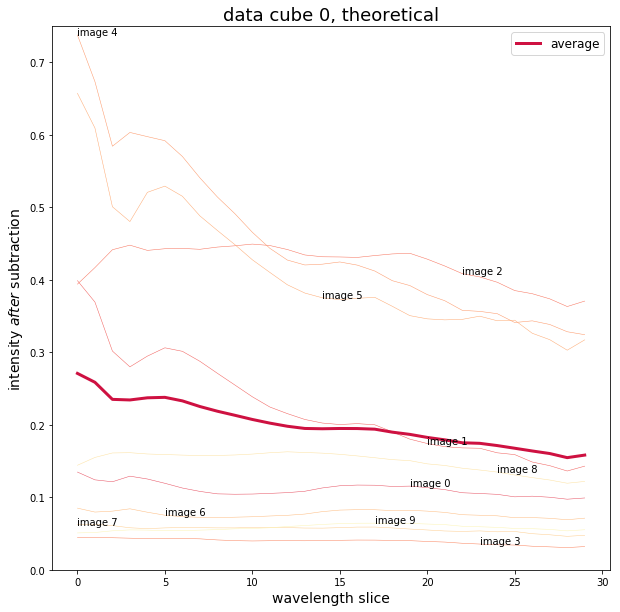

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(theo_dc0)):
    plt.plot(theo_dc0[i][:,1], #c='#ce1141', #alpha=1-i*len(theo_dc0)
             #label=f"theo{i}",
             #label=f"{np.sqrt(theo[0].positions[i][0]**2 + theo[0].positions[i][1]**2):.3f}",
             #label=f"image {i}",
             lw=.5, c=plt.cm.magma.colors[160 + 10 * i]#alpha=.5
            )
    label_loc = np.random.randint(theo_dc0.shape[1] - 1)
    plt.text(label_loc, theo_dc0[i][:,1][label_loc], f"image {i}")
    
plt.plot(theo_dc0[:,:,1].mean(axis=0), c='#ce1141', lw=3, label='average')

plt.title('data cube 0, theoretical', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

The subtraction for slice 0 of image 4 looks particularly bad. **If you did not skip the `KlipRetrieve` cells,** you can examine what happened in individual slices. To look at this slice/image/alignment strategy combination (or any of them), follow this method:


********
total intensity pre-subtract:  9.4841e-01
total intensity post-subtract: 7.3787e-01
********


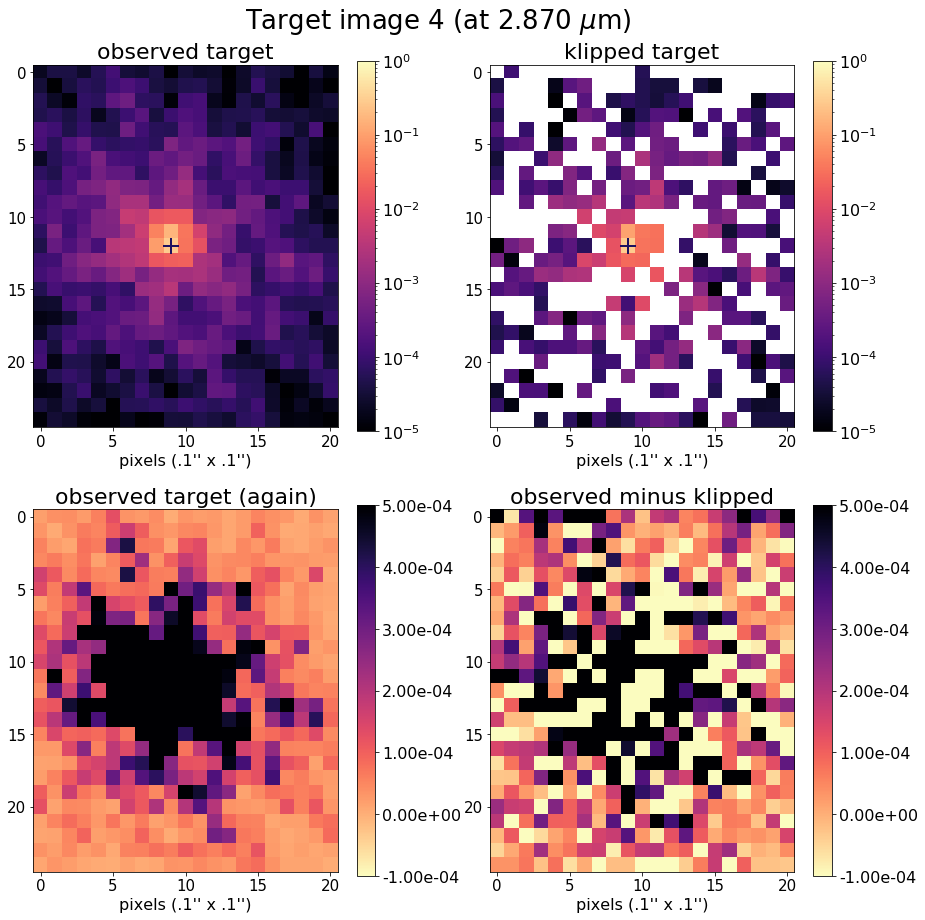

(0.9484068112987529, 0.7378663087992869)

In [ ]:
# data cube 0, image 4, slice 0
# ONLY if you did not skip KlipRetrieve cells at beginning of notebook
theo[0].plot_subtraction(target_image=4, wv_slice=0)


********
total intensity pre-subtract:  9.3251e-01
total intensity post-subtract: 4.0969e-02
********


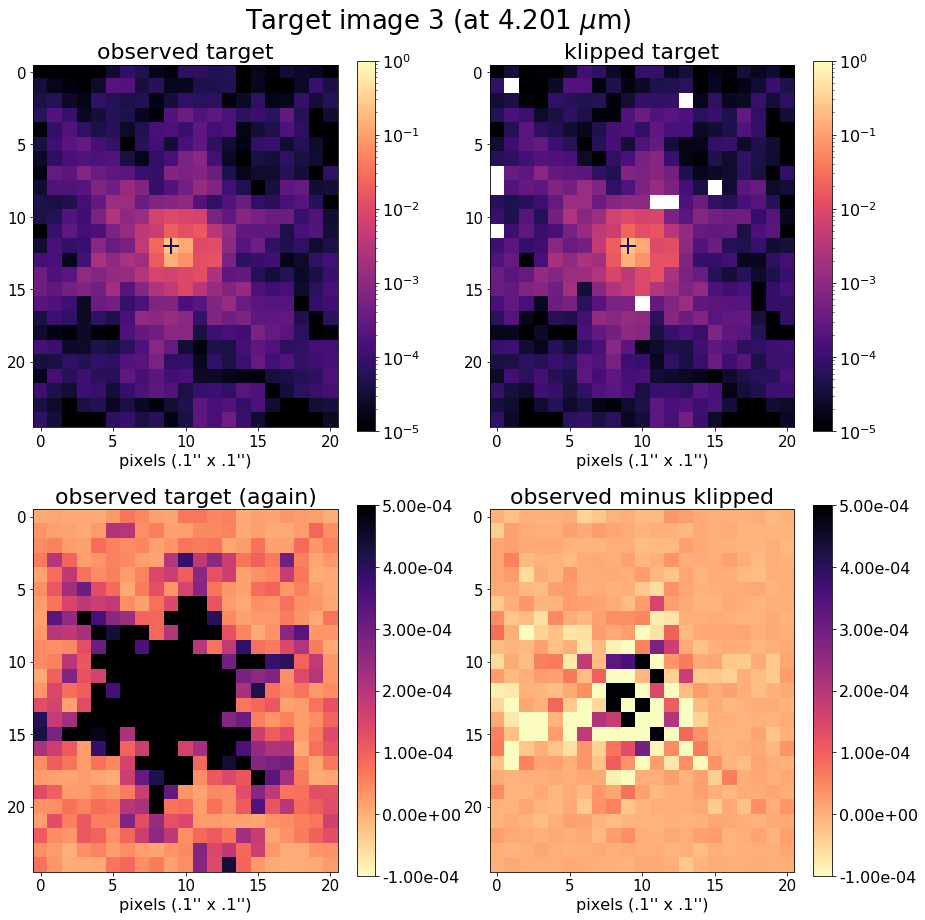

(0.932507550639577, 0.0409687205321532)

In [ ]:
# data cube 0, image 3, slice (any of them) looks a lot better
# ONLY if you did not skip KlipRetrieve cells at beginning of notebook
theo[0].plot_subtraction(target_image=3, wv_slice=17)

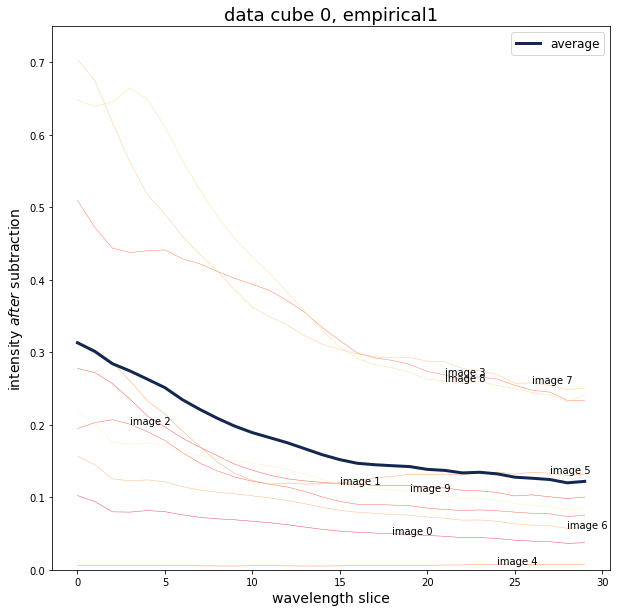

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emp1_dc0)):
    plt.plot(emp1_dc0[i][:,1], #c='#ce1141', #alpha=1-i*len(emp1_dc0)
             #label=f"image {i}",
             lw=.5, #linestyle='--',
             c=plt.cm.magma.colors[160 + 10 * i]
            )
    label_loc = np.random.randint(emp1_dc0.shape[1] - 1)
    plt.text(label_loc, emp1_dc0[i][:,1][label_loc], f"image {i}")
    
plt.plot(emp1_dc0[:,:,1].mean(axis=0), c='#13274f', lw=3, label='average')

plt.title('data cube 0, empirical1', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

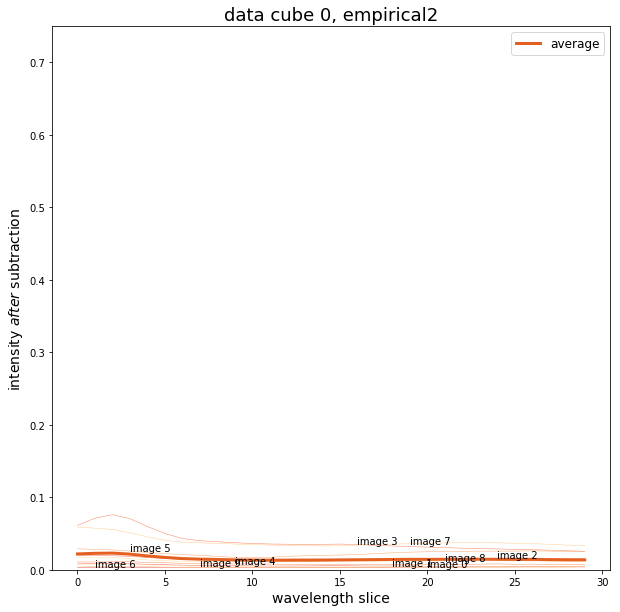

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emp2_dc0)):
    plt.plot(emp2_dc0[i][:,1], #c='#ce1141', #alpha=1-i*len(emp2_dc0)
             #label=f"image {i}",
             lw=.5,
             c=plt.cm.magma.colors[160 + 10 * i]
            )
    label_loc = np.random.randint(emp2_dc0.shape[1] - 1)
    plt.text(label_loc, emp2_dc0[i][:,1][label_loc], f"image {i}")
    
plt.plot(emp2_dc0[:,:,1].mean(axis=0), c='#e56020', lw=3, label='average')

plt.title('data cube 0, empirical2', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

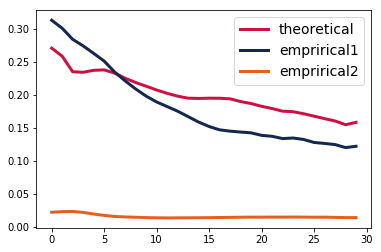

In [ ]:
plt.plot(theo_dc0[:,:,1].mean(axis=0), c='#ce1141', lw=3, label='theoretical')
plt.plot(emp1_dc0[:,:,1].mean(axis=0), c='#13274f', lw=3, label='emprirical1')
plt.plot(emp2_dc0[:,:,1].mean(axis=0), c='#e56020', lw=3, label='emprirical2')
plt.legend(fontsize=14)

### all images from data cube 5 (theo[5], emp_1[5], emp_2[5])

**If you skipped the three `KlipRetrieve` cells at the beginning of the notebook, go straight to the plots in this section.**

In [ ]:
theo_dc5 = np.zeros((n_img, # number of target images
                     n_slices, # number of wavelength slices
                     2)) # pre-subtract intensity, post-subtract intensity

In [ ]:
emp1_dc5 = theo_dc5.copy()
emp2_dc5 = theo_dc5.copy()

In [ ]:
for i in range(n_img):
    theo_dc5[i] = [theo[5].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

In [ ]:
for i in range(n_img):
    emp1_dc5[i] = [emp_1[5].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

In [ ]:
for i in range(n_img):
    emp2_dc5[i] = [emp_2[5].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

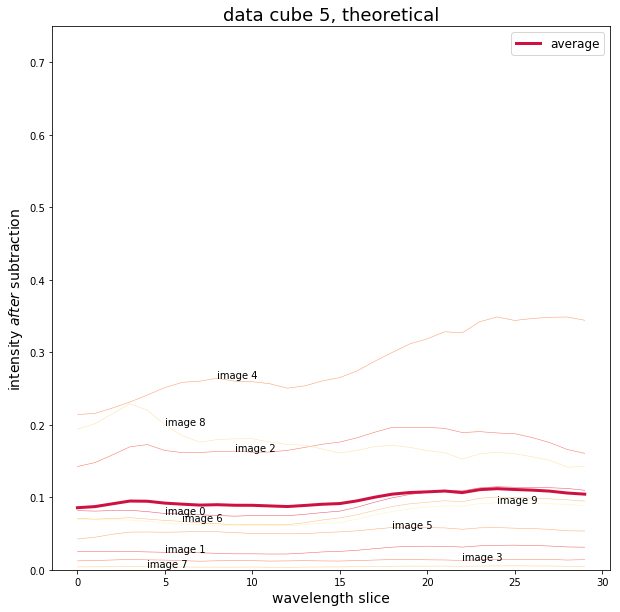

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(theo_dc0)):
    plt.plot(theo_dc5[i][:,1], #c='#ce1141', #alpha=1-i*len(theo_dc0)
             #label=f"theo{i}",
             #label=f"{np.sqrt(theo[0].positions[i][0]**2 + theo[0].positions[i][1]**2):.3f}",
             #label=f"image {i}",
             lw=.5, c=plt.cm.magma.colors[160 + 10 * i]#alpha=.5
            )
    label_loc = np.random.randint(theo_dc5.shape[1] - 1)
    plt.text(label_loc, theo_dc5[i][:,1][label_loc], f"image {i}")
    
plt.plot(theo_dc5[:,:,1].mean(axis=0), c='#ce1141', lw=3, label='average')

plt.title('data cube 5, theoretical', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

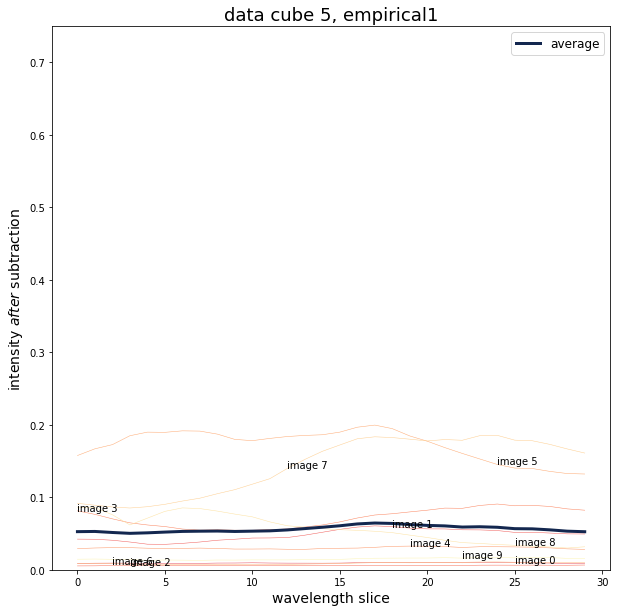

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emp1_dc0)):
    plt.plot(emp1_dc5[i][:,1], #c='#ce1141', #alpha=1-i*len(emp1_dc0)
             #label=f"image {i}",
             lw=.5, #linestyle='--',
             c=plt.cm.magma.colors[160 + 10 * i]
            )
    label_loc = np.random.randint(emp1_dc5.shape[1] - 1)
    plt.text(label_loc, emp1_dc5[i][:,1][label_loc], f"image {i}")
    
plt.plot(emp1_dc5[:,:,1].mean(axis=0), c='#13274f', lw=3, label='average')

plt.title('data cube 5, empirical1', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

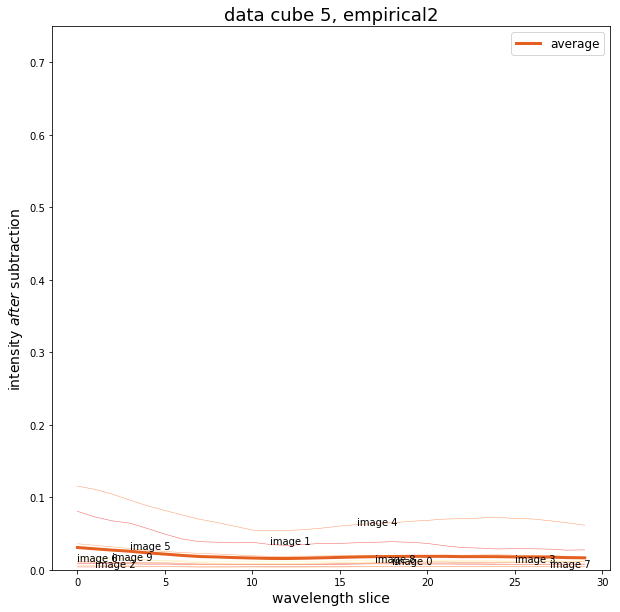

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emp2_dc0)):
    plt.plot(emp2_dc5[i][:,1], #c='#ce1141', #alpha=1-i*len(emp2_dc0)
             #label=f"image {i}",
             lw=.5,
             c=plt.cm.magma.colors[160 + 10 * i]
            )
    label_loc = np.random.randint(emp2_dc5.shape[1] - 1)
    plt.text(label_loc, emp2_dc5[i][:,1][label_loc], f"image {i}")
    
plt.plot(emp2_dc5[:,:,1].mean(axis=0), c='#e56020', lw=3, label='average')

plt.title('data cube 5, empirical2', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

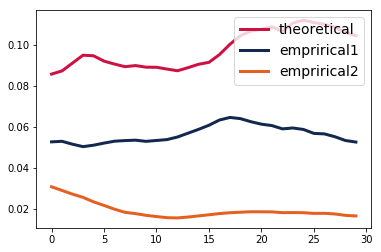

In [ ]:
plt.plot(theo_dc5[:,:,1].mean(axis=0), c='#ce1141', lw=3, label='theoretical')
plt.plot(emp1_dc5[:,:,1].mean(axis=0), c='#13274f', lw=3, label='emprirical1')
plt.plot(emp2_dc5[:,:,1].mean(axis=0), c='#e56020', lw=3, label='emprirical2')
plt.legend(fontsize=14)

### all images from data cube 3 (theo[3], emp_1[3], emp_2[3])

**If you skipped the three `KlipRetrieve` cells at the beginning of the notebook, go straight to the plots in this section.**

In [ ]:
theo_dc3 = np.zeros((n_img, # number of target images
                     n_slices, # number of wavelength slices
                     2)) # pre-subtract intensity, post-subtract intensity

In [ ]:
emp1_dc3 = theo_dc3.copy()
emp2_dc3 = theo_dc3.copy()

In [ ]:
for i in range(n_img):
    theo_dc3[i] = [theo[3].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

In [ ]:
for i in range(n_img):
    emp1_dc3[i] = [emp_1[3].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

In [ ]:
for i in range(n_img):
    emp2_dc3[i] = [emp_2[3].plot_subtraction(target_image=i,
                                            wv_slice=j, no_plot=True)
                   for j in range(n_slices)]

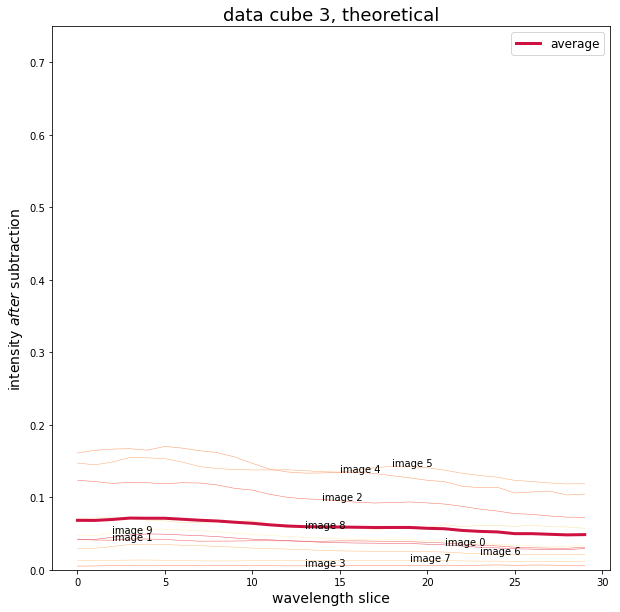

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(theo_dc0)):
    plt.plot(theo_dc3[i][:,1], #c='#ce1141', #alpha=1-i*len(theo_dc0)
             #label=f"theo{i}",
             #label=f"{np.sqrt(theo[0].positions[i][0]**2 + theo[0].positions[i][1]**2):.3f}",
             #label=f"image {i}",
             lw=.5, c=plt.cm.magma.colors[160 + 10 * i]#alpha=.5
            )
    label_loc = np.random.randint(theo_dc3.shape[1] - 1)
    plt.text(label_loc, theo_dc3[i][:,1][label_loc], f"image {i}")
    
plt.plot(theo_dc3[:,:,1].mean(axis=0), c='#ce1141', lw=3, label='average')

plt.title('data cube 3, theoretical', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

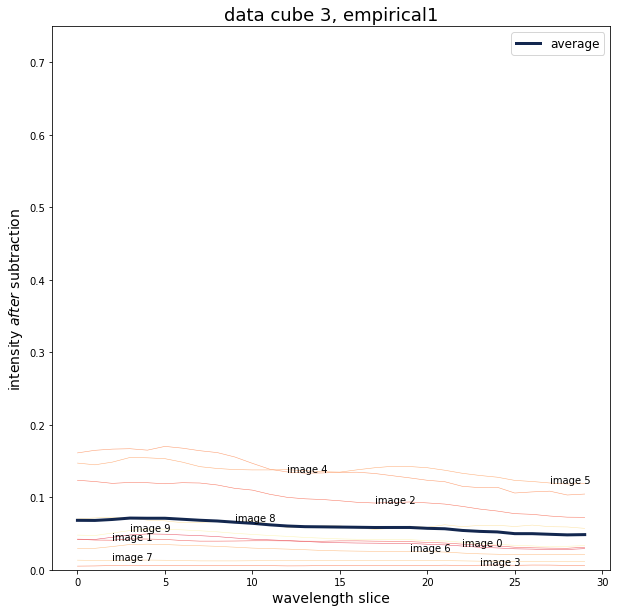

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emp1_dc0)):
    plt.plot(emp1_dc3[i][:,1], #c='#ce1141', #alpha=1-i*len(emp1_dc0)
             #label=f"image {i}",
             lw=.5, #linestyle='--',
             c=plt.cm.magma.colors[160 + 10 * i]
            )
    label_loc = np.random.randint(emp1_dc3.shape[1] - 1)
    plt.text(label_loc, emp1_dc3[i][:,1][label_loc], f"image {i}")
    
plt.plot(emp1_dc3[:,:,1].mean(axis=0), c='#13274f', lw=3, label='average')

plt.title('data cube 3, empirical1', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

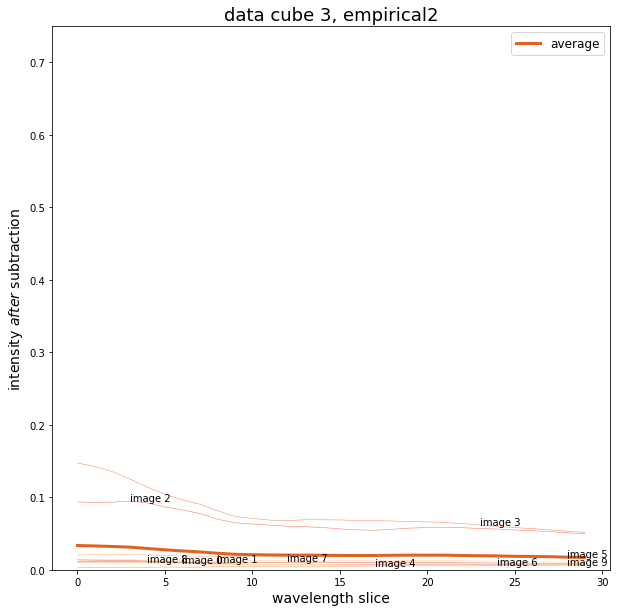

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emp2_dc0)):
    plt.plot(emp2_dc3[i][:,1], #c='#ce1141', #alpha=1-i*len(emp2_dc0)
             #label=f"image {i}",
             lw=.5,
             c=plt.cm.magma.colors[160 + 10 * i]
            )
    label_loc = np.random.randint(emp2_dc3.shape[1] - 1)
    plt.text(label_loc, emp2_dc3[i][:,1][label_loc], f"image {i}")
    
plt.plot(emp2_dc3[:,:,1].mean(axis=0), c='#e56020', lw=3, label='average')

plt.title('data cube 3, empirical2', fontsize=18)
plt.xlabel('wavelength slice', fontsize=14)
plt.ylabel('intensity $after$ subtraction', fontsize=14)
plt.ylim(0, .75)
plt.legend(fontsize=12)

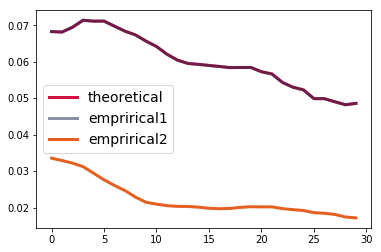

In [ ]:
plt.plot(theo_dc3[:,:,1].mean(axis=0), c='#ce1141', lw=3, label='theoretical')
plt.plot(emp1_dc3[:,:,1].mean(axis=0), c='#13274f', lw=3, alpha=.5, label='emprirical1')
plt.plot(emp2_dc3[:,:,1].mean(axis=0), c='#e56020', lw=3, label='emprirical2')
plt.legend(fontsize=14)

## Result

**The `empirical2` alignment strategy leads to the best subtractions** in all the data cubes we tested, with over 95% of the star's flux removed in every slice tested. 

_We found it surprising that the most naive strategy did the best, but we also have some ideas about how to handle scenarios where the `theoretical` case has moved the stellar points to the same pixel but some data cubes' star is on one corner of the pixel [say (.09, .09)] and some of the others are on the opposite corner of the pixel [like (-.08, 0)]. For the sample locations given, shifting the reference set on a target cube-by-target cube basis so they're centered at (.1, .1) and (-.1, 0), respectively, would lead to better subtractions than having the reference set centered at (0, 0) as they likely would be in the current `theoretical` process._

*Extra:* To save the subtraction results so we don't have to re-run this notebook, run these cells.

In [ ]:
subtractions = {k: v for k, v in locals().items() if k.find('_dc') > 0}
# hacky but works for a one-off...

In [ ]:
list(subtractions.keys())

['theo_dc0',
 'emp1_dc0',
 'emp2_dc0',
 'theo_dc5',
 'emp1_dc5',
 'emp2_dc5',
 'theo_dc3',
 'emp1_dc3',
 'emp2_dc3']

In [ ]:
subtractions['theo_dc0']

array([[[0.94867136, 0.13484477],
        [0.94796357, 0.12410776],
        [0.94712941, 0.12146031],
        [0.94607137, 0.12919351],
        [0.94510473, 0.1252703 ],
        [0.94406793, 0.11934144],
        [0.94305969, 0.11282345],
        [0.94207016, 0.10816694],
        [0.94108591, 0.10478591],
        [0.94009299, 0.10426128],
        [0.93897659, 0.10452584],
        [0.9379189 , 0.10543717],
        [0.9369513 , 0.10645474],
        [0.93607882, 0.10838069],
        [0.93524258, 0.11293535],
        [0.93439136, 0.11594329],
        [0.93353781, 0.11691254],
        [0.93272385, 0.11670434],
        [0.93192781, 0.11500722],
        [0.93106304, 0.11545998],
        [0.93013762, 0.11339426],
        [0.92907969, 0.11061091],
        [0.92813538, 0.10632214],
        [0.92713167, 0.1052631 ],
        [0.92622626, 0.10411857],
        [0.92541362, 0.10065865],
        [0.92448658, 0.1015777 ],
        [0.92377888, 0.10010269],
        [0.92295971, 0.09740613],
        [0.922

In [ ]:
#with open('/Users/jotor/repositories/subtract-psfs/pre_post_intensities.pkl', 'wb') as file:
with open('YOUR/DESIRED/PATH', 'wb') as file:
    pickle.dump(subtractions, file)